In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pit_agrs_100_30k = pd.read_csv('../cass_exp/pretrans/pit/agrs/scalarstr0.csv', header = 0);pit_agrs_100_30k

,wall_time,step,run/total_reward,run/length,loss/value_loss,loss/policy_loss,loss/agent_loss,loss/entropy,total_loss
0,1.597341e+09,0,0.0,100.0,1.762084e-01,1.227327,1.403535,1.724897,1.403535
1,1.597341e+09,100,0.0,100.0,2.041878e-05,0.257807,0.257827,0.210075,0.257827
2,1.597341e+09,200,0.0,100.0,8.691859e-08,0.302828,0.302828,0.236090,0.302828
3,1.597341e+09,300,1.0,32.0,1.468036e-01,0.794342,0.941146,1.134529,0.941146
4,1.597341e+09,332,0.0,100.0,4.280636e-02,0.833578,0.876384,0.349349,0.876384
...,...,...,...,...,...,...,...,...,...
7105,1.597393e+09,499242,1.0,39.0,1.669245e-02,0.614962,0.631654,0.618499,0.631654
7106,1.597393e+09,499281,1.0,34.0,2.813720e-02,0.664259,0.692397,0.587128,0.692397
7107,1.597393e+09,499315,1.0,14.0,2.323291e-02,0.766153,0.789386,0.592540,0.789386
7108,1.597393e+09,499329,1.0,22.0,2.360278e-02,0.659142,0.682745,0.667362,0.682745


In [3]:
pit_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).std()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs = df_av_at_step
df_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.000000,100.000000,0.000000,0.000000
1,100.0,0.000000,100.000000,0.000000,0.000000
2,200.0,0.000000,100.000000,0.000000,0.000000
3,300.0,0.250750,82.948966,0.500500,34.033983
4,332.0,0.200400,86.372827,0.447549,30.433316
...,...,...,...,...,...
7105,499242.0,0.702055,61.867897,0.457584,27.669776
7106,499281.0,0.702650,61.812217,0.457320,27.670145
7107,499315.0,0.703245,61.716688,0.457056,27.724900
7108,499329.0,0.703837,61.637334,0.456792,27.753969


In [4]:
pit_no_agrs_100_30k = pd.read_csv('../cass_exp/pretrans/pit/no_agrs/scalarstr0.csv', header = 0)

pit_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        
# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).std()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_no_agrs = df_av_at_step
df_no_agrs

,step,reward,length,reward_se,length_se
0,0.0,1.000000,25.000000,0.000000,0.000000
1,25.0,0.499500,62.537500,0.707107,53.033009
2,125.0,0.332667,75.049983,0.577061,43.279607
3,225.0,0.500001,69.019438,0.577351,37.314743
4,276.0,0.399600,75.240360,0.547632,35.153700
...,...,...,...,...,...
7608,498992.0,0.752347,57.658075,0.431865,27.113141
7609,499059.0,0.752842,57.638778,0.431575,27.089479
7610,499107.0,0.751338,57.723416,0.432454,27.128498
7611,499207.0,0.751834,57.672020,0.432165,27.125739


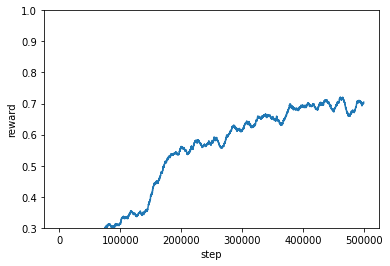

In [5]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_agrs)

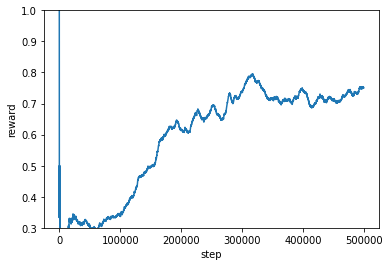

In [6]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_no_agrs)

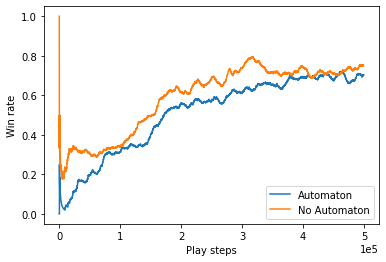

In [7]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Stochastic MineRecycler, Pre-Transfer')
sns.lineplot(x="step", y="reward", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs.set(xlabel='Play steps', ylabel='Win rate')

axs.legend(['Automaton', 'No Automaton'], loc=4)